#Clone Project and install dependencies

In [2]:
!git clone https://github.com/melissatanioss/DenseDepth.git

Cloning into 'DenseDepth'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 63 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [ ]:
!pip install keras pillow matplotlib scikit-learn scikit-image opencv-python pydot

In [ ]:
!pip install PyGLM PySide2 pyopengl

     |████████████████████████████████| 7.3 MB 4.2 MB/s 
     |████████████████████████████████| 164.3 MB 1.2 MB/s 
     |████████████████████████████████| 975 kB 45.7 MB/s 


In [3]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./DenseDepth/nyu.h5

--2022-02-07 17:06:27--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.116.96
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.116.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./DenseDepth/nyu.h5’

./DenseDepth/nyu.h5 100%[===================>] 164.89M  1.96MB/s    in 1m 44s  

2022-02-07 17:08:11 (1.58 MB/s) - ‘./DenseDepth/nyu.h5’ saved [172897376/172897376]



#Get NYU Data

In [4]:
!gdown https://drive.google.com/uc?id=1fdFu5NGXe4rTLYKD5wOqk9dl-eJOefXo /content/DenseDepth

Downloading...
From: https://drive.google.com/uc?id=1fdFu5NGXe4rTLYKD5wOqk9dl-eJOefXo
To: /content/nyu_data.zip
100% 4.40G/4.40G [01:12<00:00, 60.7MB/s]


In [5]:
!unzip /content/nyu_data.zip

Streaming output truncated to the last 5000 lines.
 extracting: data/nyu2_train/playroom_0004_out/39.png  
  inflating: data/nyu2_train/playroom_0004_out/4.jpg  
 extracting: data/nyu2_train/playroom_0004_out/4.png  
  inflating: data/nyu2_train/playroom_0004_out/40.jpg  
 extracting: data/nyu2_train/playroom_0004_out/40.png  
  inflating: data/nyu2_train/playroom_0004_out/41.jpg  
 extracting: data/nyu2_train/playroom_0004_out/41.png  
  inflating: data/nyu2_train/playroom_0004_out/42.jpg  
 extracting: data/nyu2_train/playroom_0004_out/42.png  
  inflating: data/nyu2_train/playroom_0004_out/43.jpg  
 extracting: data/nyu2_train/playroom_0004_out/43.png  
  inflating: data/nyu2_train/playroom_0004_out/44.jpg  
 extracting: data/nyu2_train/playroom_0004_out/44.png  
  inflating: data/nyu2_train/playroom_0004_out/45.jpg  
 extracting: data/nyu2_train/playroom_0004_out/45.png  
  inflating: data/nyu2_train/playroom_0004_out/46.jpg  
 extracting: data/nyu2_train/playroom_0004_out/46.png  

#Get NYU test

In [6]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu_test.zip /content/DenseDepth

--2022-02-07 17:11:11--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu_test.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.85.91
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.85.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1406362472 (1.3G) [application/zip]
Saving to: ‘nyu_test.zip’

nyu_test.zip        100%[===================>]   1.31G  27.9MB/s    in 49s     

2022-02-07 17:12:01 (27.4 MB/s) - ‘nyu_test.zip’ saved [1406362472/1406362472]



In [7]:
!unzip /content/nyu_test.zip

Archive:  /content/nyu_test.zip
 extracting: eigen_test_rgb.npy      
 extracting: eigen_test_crop.npy     
 extracting: eigen_test_depth.npy    


#Test the code

In [ ]:
!cd DenseDepth; python test.py

Loading model...

Model loaded (nyu.h5).

Loaded (12) images of size (480, 640, 3).
<Figure size 1000x500 with 1 Axes>


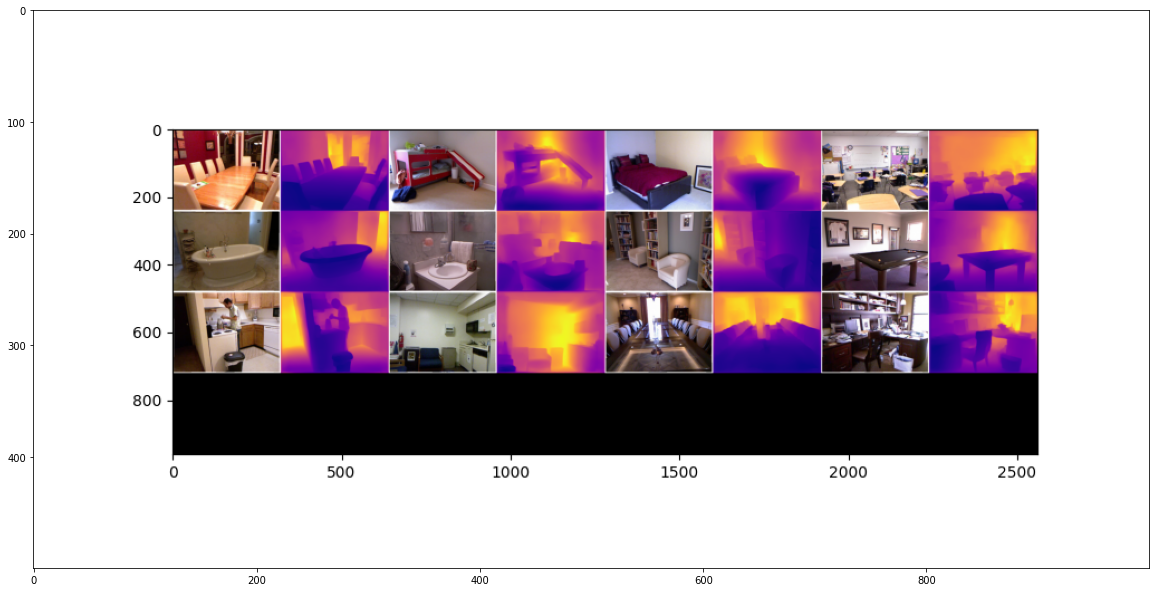

In [ ]:
from matplotlib import pyplot as plt
from skimage import io

plt.figure(figsize=(20,20))
plt.imshow( io.imread('./DenseDepth/test.png') )

python3: can't open file 'test_pytorch.py': [Errno 2] No such file or directory


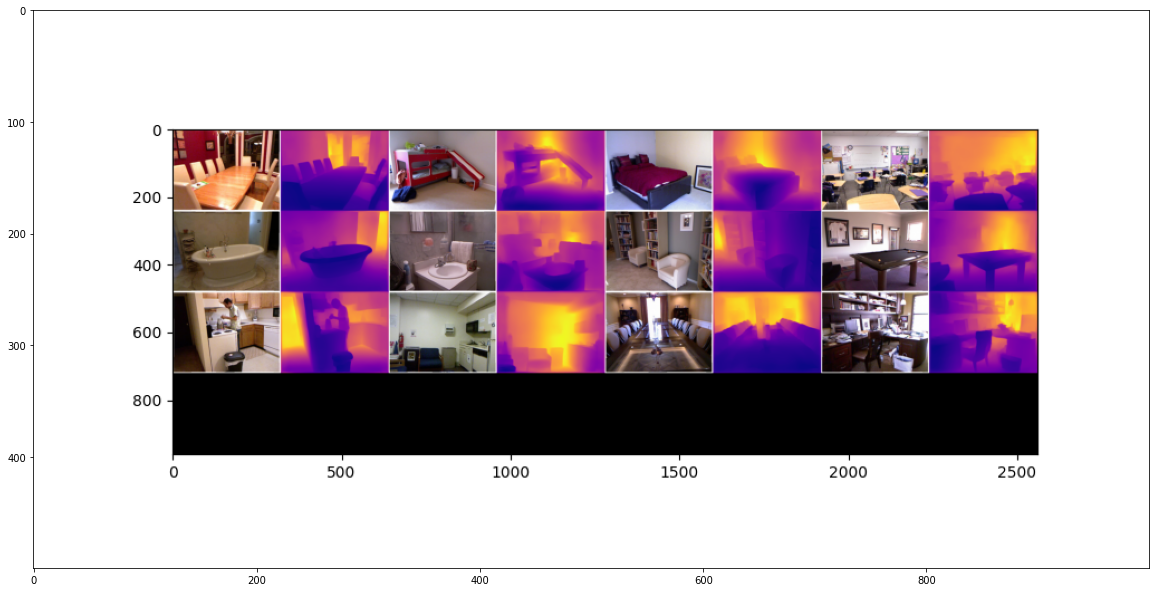

In [ ]:
!cd DenseDepth/PyTorch; python test_pytorch.py
from matplotlib import pyplot as plt
from skimage import io

plt.figure(figsize=(20,20))
plt.imshow( io.imread('./DenseDepth/test.png') )

In [ ]:
!pwd

/content


#Evaluate data

In [ ]:
!cd DenseDepth; python evaluate.py

Loading model...
Loading test data...Test data loaded.

Testing...
Traceback (most recent call last):
  File "evaluate.py", line 40, in <module>
    e = evaluate(model, rgb, depth, crop, batch_size=6)
  File "/content/DenseDepth/utils.py", line 123, in evaluate
    pred_y_flip = scale_up(2, predict(model, x[...,::-1,:]/255, minDepth=10, maxDepth=1000, batch_size=bs)[:,:,:,0]) * 10.0
  File "/content/DenseDepth/utils.py", line 12, in predict
    predictions = model.predict(images, batch_size=batch_size)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1789, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorf

#Install Librairies and Dependencies

In [8]:
!pip install tensorboardX

     |████████████████████████████████| 124 kB 4.6 MB/s 


In [9]:
!pip uninstall keras 
!pip install keras==2.2.4
!pip uninstall tensorflow
!pip install tensorflow==1.13.1

Found existing installation: keras 2.7.0
Uninstalling keras-2.7.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras/*
Proceed (y/n)? y
  Successfully uninstalled keras-2.7.0
     |████████████████████████████████| 312 kB 5.5 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.2.4 which is incompatible.
Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/to

In [10]:
!pip install "git+https://github.com/google/uncertainty-baselines.git#egg=uncertainty_baselines[models]"



  Cloning https://github.com/google/uncertainty-baselines.git to /tmp/pip-install-4x5r5eyh/uncertainty-baselines_b98ef44e5f5f470da8cc1c4e2a1873dd
  Running command git clone -q https://github.com/google/uncertainty-baselines.git /tmp/pip-install-4x5r5eyh/uncertainty-baselines_b98ef44e5f5f470da8cc1c4e2a1873dd
  Cloning https://github.com/google-research/robustness_metrics.git to /tmp/pip-install-4x5r5eyh/robustness-metrics_f805365b8f13437f823739957a105466
  Running command git clone -q https://github.com/google-research/robustness_metrics.git /tmp/pip-install-4x5r5eyh/robustness-metrics_f805365b8f13437f823739957a105466
  Cloning https://github.com/google/edward2.git to /tmp/pip-install-4x5r5eyh/edward2_f7f18fe1c4384259bebbeacd295bd653
  Running command git clone -q https://github.com/google/edward2.git /tmp/pip-install-4x5r5eyh/edward2_f7f18fe1c4384259bebbeacd295bd653
     |████████████████████████████████| 77 kB 2.9 MB/s 
     |████████████████████████████████| 4.0 MB 29.9 MB/s 
     |

In [11]:
!pip install PyJWT==1.7.1


In [13]:
!pip install 'h5py==2.10.0' --force-reinstall


     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 15.7 MB 32.6 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.13.1 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is in

#Train Data

In [ ]:
!cd DenseDepth/PyTorch; python data.py

In [ ]:
!cd DenseDepth/PyTorch; python model.py

In [ ]:
!cd DenseDepth/PyTorch; python train.py

Traceback (most recent call last):
  File "train.py", line 11, in <module>
    from model import Model
ImportError: cannot import name 'Model' from 'model' (/content/DenseDepth/PyTorch/model.py)


In [ ]:
!cd DenseDepth; python train.py --data nyu --gpus 1 --bs 2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
!cd DenseDepth; python callbacks.py

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

#Download DenseDepth

In [ ]:
!zip -r data.zip /content/DenseDepth/data

In [ ]:
!zip -r DenseDepth.zip /content/DenseDepth